In [25]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import statsmodels.formula.api as sm
import warnings 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [26]:
! pip install imblearn

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5

In [28]:
warnings.filterwarnings('ignore')

# Description of Variables

- Age: The age of the employee. (Numerical)
- Attrition: Whether or not the employee has left the organization. (Categorical)
- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- Department: The department the employee works in. (Categorical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EducationField: The field of study for the employee's education. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobRole: The role of the employee in the organization. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MaritalStatus: The marital status of the employee. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

- make people who leave the job 1 (bc there are far less of them)
- min false neg rate to maximizew recall 
- precision recall is a good metric to optimize (most imp recall)
- minimize ppl who will leave

In [32]:
df=pd.read_csv("HR_Analytics.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'HR_Analytics.csv'

In [ ]:
#Load data
df=pd.read_csv("HR_Analytics.csv")
df = pd.get_dummies(df, columns = ["Attrition"])
df.head()

In [ ]:
#Keep the dummy column where employees leaving = 1, because there are far less of them and we want to minimize FNR and recall
df = df.drop(["Attrition_No"], axis = 1)

In [ ]:
#Splitting up data into train and test data - train has 70% of values and test has 30%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

In [ ]:
#Printing the ratio of No's and Yes's to the response variable (Attrition) for train and test to make sure they are similar
print(train.Attrition_Yes.value_counts()[1]/train.Attrition_Yes.value_counts()[0])
print(test.Attrition_Yes.value_counts()[1]/test.Attrition_Yes.value_counts()[0])

In [ ]:
#Shape of data
print(train.shape)
print(test.shape)

In [ ]:
#There are zero missing values that need to be filled in either data set
print(train.isna().sum())
print(test.isna().sum())

In [ ]:
#All column names in dataframe
train.columns

In [30]:
#Finding correlations between variables and response
train.corrwith(train.Attrition_Yes).sort_values(ascending = False)

Attrition_Yes               1.000000
DistanceFromHome            0.065658
NumCompaniesWorked          0.029205
MonthlyRate                 0.001126
PerformanceRating          -0.007033
EmployeeNumber             -0.020580
PercentSalaryHike          -0.021023
TrainingTimesLastYear      -0.036240
WorkLifeBalance            -0.039167
Education                  -0.042102
HourlyRate                 -0.044921
YearsSinceLastPromotion    -0.048035
RelationshipSatisfaction   -0.061508
DailyRate                  -0.081930
JobSatisfaction            -0.098817
EnvironmentSatisfaction    -0.113397
JobInvolvement             -0.121431
StockOptionLevel           -0.145659
YearsAtCompany             -0.150960
YearsWithCurrManager       -0.153679
MonthlyIncome              -0.164937
JobLevel                   -0.169904
YearsInCurrentRole         -0.178133
Age                        -0.182642
TotalWorkingYears          -0.185703
dtype: float64

In [31]:
train.Over18.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Over18'

In [14]:
#Drop employee count, over 18 and standard hours because they are the same value for every person
train = train.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
test = test.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

# Visualizations of initial thoughts on variables that could be correlated

In [ ]:
# calculate the null count for each column
null_count = df.isnull().sum()
null_count.name = 'count of null' 

# find the datatype for each column
dtype = df.dtypes
dtype.name = 'data type'

# describe the dataframe to get other statistics
data_desc = df.describe(include='all', datetime_is_numeric=True)

# remove count, freq, mean, std, 25%, 50%, and 75% percentiles
data_desc = data_desc.drop(['count', 'freq', 'std', '25%', '75%', 'top'], axis=0)

# transpose the dataframe to prevent the dataframe from being too wide.
data_desc_T = data_desc.T

# add the row of null count and datatype to the dataframe
data_desc_T = pd.concat([dtype, null_count, data_desc_T], axis=1)

# order the summary statistics table by datatype and count of null
data_desc_T = data_desc_T.sort_values(['data type', 'count of null'])

# show the summary statistics table
data_desc_T

In [ ]:
df = df.drop(columns = ['Over18','StandardHours','EmployeeCount'])
# We should just drop these columns because they only have 1 unique values and contain no information

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

In [ ]:
# count the number of attrition entries
attrition_counts = df['Attrition_Yes'].value_counts()

# calculate the percentage out of total entries
attrition_percent = attrition_counts/attrition_counts.sum()

# make labels for plots
labels = ['Attrition_No-'+str((attrition_percent[0]*100).round(2))+'%', 'Attrition_Yes-'+str((attrition_percent[1]*100).round(2))+'%']

In [ ]:
# check for class imbalance of the outcome variable
plt.pie(attrition_counts, labels=labels, colors=['lightblue', 'orange'])
plt.title('Class Distribution')
plt.show()

class imbalance in the outcome variable, maybe do resampling techniques: This involves either oversampling the minority class by duplicating existing examples or undersampling the majority class by reducing the number of examples. Common resampling techniques include random oversampling, random undersampling, and Synthetic Minority Over-sampling Technique (SMOTE). Do this before training the model

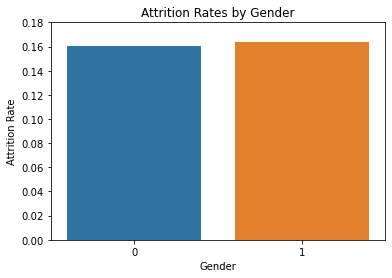

In [15]:
#percentage of people who stay/leave by gender
gender_data = train.groupby('Gender')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
gender_data
# Bar plot of gender vs. attrition
sns.barplot(x=gender_data.index, y=gender_data.attrition_rate)
plt.title('Attrition Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.18))
plt.show()

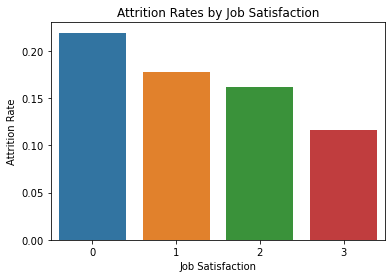

In [16]:
#percentage of people who stay/leave by job satisfaction
satisfaction_data = train.groupby('JobSatisfaction')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
satisfaction_data
# Bar plot of gender vs. attrition
sns.barplot(x=satisfaction_data.index, y=satisfaction_data.attrition_rate)
plt.title('Attrition Rates by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.show()

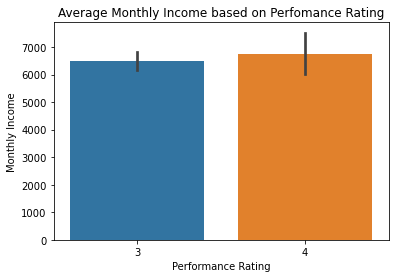

In [17]:
# Bar plot of gender vs. attrition
sns.barplot(x=train.PerformanceRating, y=train.MonthlyIncome)
plt.title('Average Monthly Income based on Perfomance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Monthly Income')
plt.show()

## END OF CATHERINE'S WORK - Continue working on visualizations of variables to see what may influence attrition rate/what could be interaction terms

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df, x='Attrition_Yes', y='DailyRate', ax=axes[0, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='Age', ax=axes[0, 1])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyRate', ax=axes[1, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyIncome', ax=axes[1, 1])

In [ ]:
df['Count']=1

In [ ]:
#Binning MonthlyIncome
binned_income = pd.qcut(df['MonthlyIncome'],11,retbins=True)
#Finding percentage of fraud cases in each bin
income_data = df.groupby(binned_income[0])['Attrition_Yes'].agg([('Attrition_Yes','mean'),('Count','count')]).reset_index(drop=False)
income_data

In [ ]:
#Visualizing percentage of attrition with increasing monthly income
sns.lineplot(x = income_data.index, y= income_data['Attrition_Yes'])
plt.xlabel('income_bin')

In [ ]:
#Binning MonthlyIncome
binned_age = pd.qcut(df['Age'],11,retbins=True)
#Finding percentage of fraud cases in each bin
age_data = df.groupby(binned_age[0])['Attrition_Yes'].agg([('Attrition_Yes','mean'),('Count','count')]).reset_index(drop=False)
age_data

In [ ]:
#Visualizing percentage of attrition with increasing monthly income
sns.lineplot(x = age_data.index, y= age_data['Attrition_Yes'])
plt.xlabel('age_bin')

Text(0, 0.5, 'MonthlyIncome')

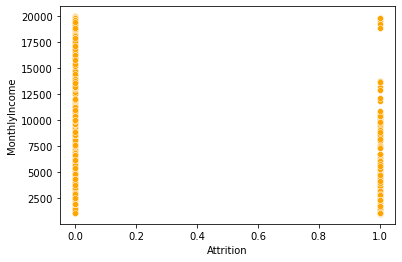

In [64]:
sns.scatterplot(x = train_num.Attrition, y = train_num.MonthlyIncome, color = 'orange')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')

In [55]:
ols_object = smf.ols(formula = 'Attrition~DailyRate + Age + MonthlyIncome', data = train_num)
model = ols_object.fit()
model.summary()

#This is wrong. it's for linear regression not logistic regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     18.76
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.09e-12
Time:                        18:33:58   Log-Likelihood:                -587.59
No. Observations:                1470   AIC:                             1183.
Df Residuals:                    1466   BIC:                             1204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4123      0.044      9.395      0.000       0.326       0.498
DailyRate     -4.987e-05   2.34e-05     -2.134      0.033   -9.57e-05   -4.03e-06
Age              -0.0042      0.001     -3.565      0.000      -0.007      -0.002
MonthlyIncome -8.357e-06   2.31e-06     -3.619      0.000   -1.29e-05   -3.83e-06
==============================================================================
Omnibus:                      415.733   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.311
Skew:                           1.741   Prob(JB):                    1.24e-183
Kurtosis:                       4.274   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In machine learning, having a class imbalance problem can lead to biased models and poor predictive performance. If one class has significantly fewer examples than the other classes, the model may not learn enough from the minority class and may struggle to generalize well to new data.
In our case, having only 16% of Attrition = Yes suggests that our dataset has a significant class imbalance. This can lead to issues such as too many false negatives and reduced model performance overall.
To address this class imbalance problem, we chose to oversample the minority class, as shown in the code below.

In [ ]:
# separate the target variable and predictor variables
X = df.drop(columns = ['Attrition_Yes','Count'], axis=1)
y = df['Attrition_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform oversampling on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# print the number of examples in each class before and after oversampling
print("Before oversampling:")
print(y_train.value_counts())
print("After oversampling:")
print(y_train_resampled.value_counts())

In [ ]:
y_train_resampled.name = 'Attrition_Yes'
train = pd.concat([X_train_resampled, pd.DataFrame(y_train_resampled)],axis =1)

In [ ]:
column_list = X_train_resampled.columns.to_list()

In [ ]:
formula = 'Attrition_Yes~'+'+'.join(column_list)

In [ ]:
column_list

In [ ]:
model = smf.logit(formula=formula, data=train).fit()
model.summary()

confusion matrix for this model. Call it baseline model. Then, do transformations from here using graphs for justification.

In [63]:
train2_num.corrwith(train2_num.booking_status).sort_values(ascending = False)

booking_status                          1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
dtype: float64

In [ ]:


train_num.columns = train_num.columns.str.replace(' ', '_')
# Attrition = 1 if left org (if yes)
train_num['Attrition'] = train_num['Attrition'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
train_num['BusinessTravel'] = train_num['BusinessTravel'].apply(
    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
train_num['Department'] = train_num['Department'].apply(
    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
train_num['EducationField'] = train_num['EducationField'].apply(
    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# Gender = 1 if male, 0 if female
train_num['Gender'] = train_num['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# diff num for diff job roles, 1 = Human Resources
train_num['JobRole'] = train_num['JobRole'].apply(
    lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
    else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
    else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# MaritalStatus = 1 if Divorced
train_num['MaritalStatus'] = train_num['MaritalStatus'].apply(
    lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
# Over18 everyone is over 18
train_num['Over18'] = train_num['Over18'].apply(lambda x: 1 if x=='Y' else 0)
# OverTime = 1 if Yes, 0 if no
train_num['OverTime'] = train_num['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
train_num.head()

ordinal, should not do this step^, assigning more value to different categories, would have to make dummy variables